In [2]:
#PROBLEM STATEMENT
#The Credit Card Fraud Detection Problem includes modeling past credit card transactions with the knowledge 
#of the ones that turned out to be fraud. This model is then used to identify whether a new transaction 
#is fraudulent or not. Our aim here is to detect 100% of the fraudulent transactions while minimizing the 
#incorrect fraud classifications.



import sys
import numpy
import pandas
import matplotlib
import seaborn
import scipy
import sklearn

#To substitute variable into string

print('Numpy:{}'.format(numpy.__version__))

Numpy:1.13.3


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
data=pd.read_csv('creditcard.csv')

In [8]:
data.columns
# 0 for correct transaction
# 1 for fraudulent transaction

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [6]:
data.shape

(284807, 31)

In [7]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,...,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [9]:
data=data.sample(frac=0.1,random_state=1)
data.shape

(28481, 31)

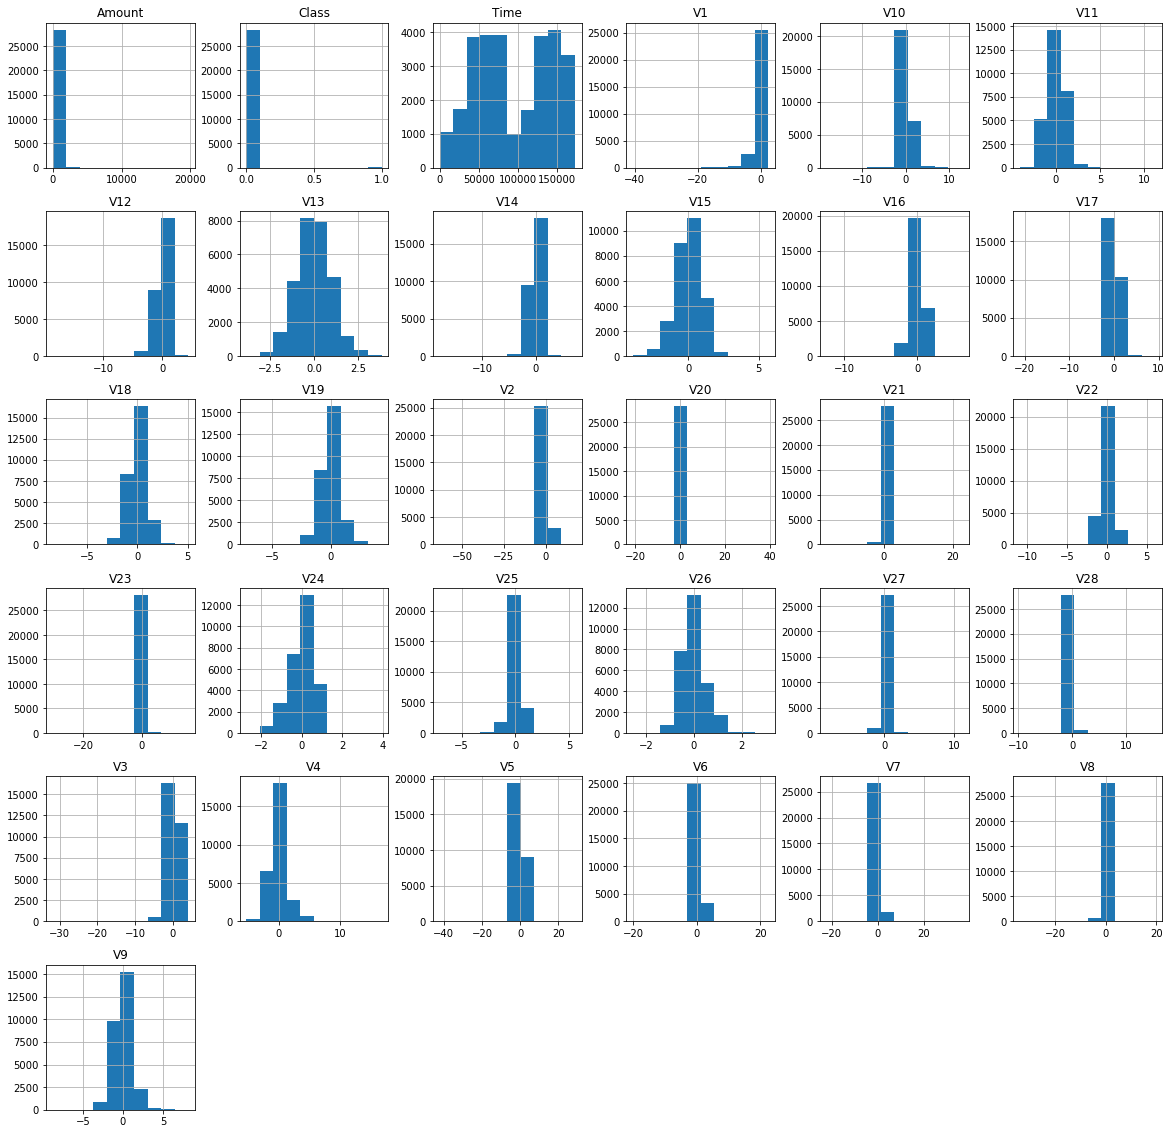

In [10]:
data.hist(figsize=(20,20))
plt.show()

In [12]:
#Determine no of fraud cases in data
fraud=data[data['Class']==1]
valid=data[data['Class']==0]

outlier_fraction=len(fraud)/float(len(valid))
print(outlier_fraction)
print('Fraud Cases:{}'.format(len(fraud)))
print('Valid Cases:{}'.format(len(valid)))

0.0017234102419808666
Fraud Cases:49
Valid Cases:28432


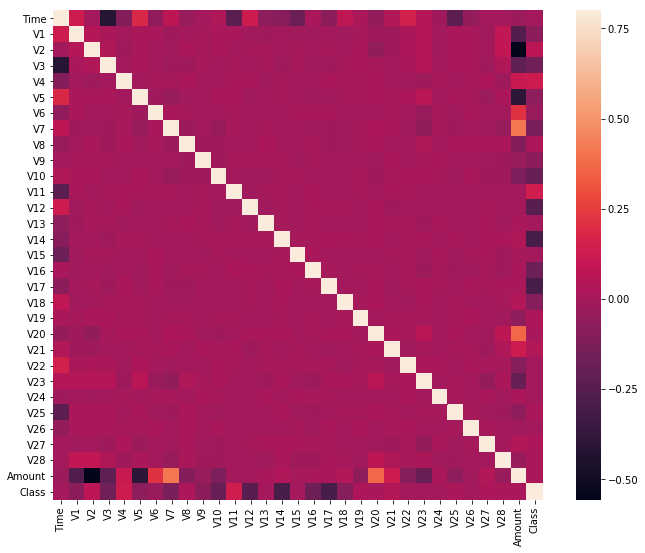

In [13]:
# Correlation matrix

corrmat=data.corr()
fig=plt.figure(figsize=(12,9))
sns.heatmap(corrmat,vmax=0.8,square=True)
plt.show()


In [14]:
#Get all the columns from the data frame
columns=data.columns.tolist()

# Filter the columns to remove data we do not want
columns=[c for c in columns if c not in ["Class"]]

#Store the variable we will be predicting on

target="Class"

X=data[columns]
Y=data[target]

print(X.shape)
print(Y.shape)



(28481, 30)
(28481,)


In [21]:
#anomaly detection methods   (support vector machine for outlier detection)
#local outlier factor is an unsupervised outlier detection method and it calculates the anomaly score of each sample 
#it measures the local deviation of density of a given sample with respect to its neighbours it is local in that
#anomaly score depends on how isolated the object is with respect to the surrounding neighbourhood(k nearest neighbours)

#isolation forest algorithm is going to return the anomaly score of each sample 
#it isolates the observations by randomly selecting a feature and the randomly selecting a split value between the maximum 
#and minimum values of the selected feature (random forest algorithms)

from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor


#define a random state

state=1

#define the outlier detection methods

classifiers={
    "Isolation Forest":IsolationForest(max_samples=len(X),
                                       contamination = outlier_fraction,
                                       random_state=state),
    
    "Local Outlier Factor":LocalOutlierFactor(
    n_neighbors = 20,
    contamination = outlier_fraction)
}

In [25]:
#Fit the model

n_outliers=len(fraud)

for i,(clf_name,clf) in enumerate(classifiers.items()):
    
    #fit the data and tag outliers
    
    if clf_name=="Local Outlier Factor":
        y_pred=clf.fit_predict(X)
        scored_pred=clf.negative_outlier_factor_
    else:
        clf.fit(X)
        scores_pred=clf.decision_function(X)
        y_pred = clf.predict(X)

    #Reshape the prediction values to 0 for valid ,1 for fraud
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    
    n_errors = (y_pred!=Y).sum()
    
    #Run classification metrics
    print('{}: {}'.format(clf_name,n_errors))
    print(accuracy_score(Y,y_pred))
    print(classification_report(Y,y_pred))
    
    #Local Outlier Factor
    #For class 0 we have a precision of 100%, for class 1 it is very less it means we have very few actual fraudulent
    #cases that are getting labeled as fraudulent cases
    #precision(False positives)  
    #Precision: Precision is the ratio of correctly predicted fraud cases to total predicted fraud cases.
    #Recall(False negatives)
    
    #Isolation Forest
    #We are corectly identifying about 30 percent of our actual fraudulent cases 
    

Isolation Forest: 71
0.997507110003
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     28432
          1       0.28      0.29      0.28        49

avg / total       1.00      1.00      1.00     28481

Local Outlier Factor: 97
0.996594220709
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     28432
          1       0.02      0.02      0.02        49

avg / total       1.00      1.00      1.00     28481

